In [0]:
import pandas as pd
from numpy import dot
from numpy.linalg import norm
import numpy as np

    #csv 파일 읽어오기
#data = pd.read_csv('bbb.csv',encoding='euc-kr')
   #성연령별
data = pd.read_csv('ccc.csv',encoding='euc-kr')

    #지번코드로 인덱스, 안해도될듯 하다
ind = pd.Series(data.index, index = data['지번코드']).drop_duplicates()


    #csv 파일을 행렬로 리턴
def csv_to_mat(csvFile):
    #유사도계산할 부분만 잘라서 저장
    #sliceData=csvFile.iloc[:,2:26]
    sliceData=csvFile.iloc[:,26:50]
    #성연령별
    
    mat = np.array(sliceData)
    # 피어쓴유사도를 위해 평균을 빼준다
    t=np.array(mat.shape)
    n=t[0];m=t[1];
    for i in range(0,n):
        mean = np.mean(mat[i])
        for j in range(0,m):
            mat[i][j] -= mean
    return mat

mat = csv_to_mat(data)

def cos_sim_AwithAll(a,mat):  
    u=mat[a:a+1]
    t=np.array(mat.shape)
    n=t[0];m=t[1];
    for i in range(0,n):
        v=mat[i:i+1]
        v = v.reshape(m,1)
        sim=dot(u,v)/(norm(u)*norm(v))
        print("%s : %lf"%(i,sim))
    return
  
def cos_sim_A_B(a,b,mat):
  u=mat[a:a+1]
  v=mat[b:b+1]
  t=np.array(mat.shape)
  n=t[0];m=t[1];
  v=v.reshape(m,1)
  sim=dot(u,v)/(norm(u)*norm(v))
  return sim
  



  #우선순위큐로 클러스터링해보자

  
t = np.array(mat.shape)

In [0]:
import pandas as pd
from numpy import dot
from numpy.linalg import norm
import numpy as np

    #csv 파일 읽어오기
#data = pd.read_csv('bbb.csv',encoding='euc-kr')
#sliceData = data.iloc[:,26:50]
sliceData = data.iloc[:,2:26]
   #성연령별
data = pd.read_csv('ccc.csv',encoding='euc-kr')
sliceData = data.iloc[:,2:14]
#sliceData = data.iloc[:,14:26]


In [0]:
sliceData

,10대이하 남자 유동인구,20대 남자 유동인구,30대 남자 유동인구,40대 남자 유동인구,50대 남자 유동인구,60대이상 남자 유동인구,10대이하 여자 유동인구,20대 여자 유동인구,30대 여자 유동인구,40대 여자 유동인구,50대 여자 유동인구,60대이상 여자 유동인구
0,0.622242,0.706243,2.744311,4.456228,3.504328,2.812614,1.076816,0.534734,1.608878,2.181020,2.398955,2.647618
1,2.493477,2.474439,7.220746,12.196511,11.727909,9.981757,2.249156,1.978115,4.188694,6.705384,7.201708,6.532873
2,1.210416,1.789906,4.600516,6.572285,4.558766,2.942039,1.151632,1.103035,2.773202,3.268524,2.462916,2.007507
3,7.869040,11.720561,32.079531,43.747654,28.670393,18.662918,6.191024,8.116367,15.935140,20.690298,17.143051,16.319073
4,197.749209,403.507738,562.213850,633.440185,447.112774,252.768862,206.811297,376.406143,468.923308,562.674937,393.890041,215.686178
...,...,...,...,...,...,...,...,...,...,...,...,...
10105,0.001336,0.002672,0.023881,0.085170,0.152471,0.150300,0.000668,0.002672,0.017869,0.030394,0.068303,0.070474
10106,0.003340,0.004676,0.040915,0.121075,0.161489,0.154976,0.006847,0.010020,0.029058,0.042585,0.100701,0.091516
10107,0.007014,0.010020,0.074983,0.187207,0.357380,0.345690,0.003841,0.010020,0.043754,0.084836,0.168336,0.172511
10108,0.000668,0.000835,0.021877,0.077822,0.133934,0.142451,0.000501,0.001169,0.009686,0.027221,0.060287,0.059619


In [0]:
matrix=np.matrix(sliceData)

In [0]:
matrix

matrix([[1.768e+01, 1.155e+01, 8.120e+00, ..., 6.540e+01, 4.148e+01,
         2.591e+01],
        [2.219e+01, 1.481e+01, 1.033e+01, ..., 7.378e+01, 4.890e+01,
         3.173e+01],
        [9.750e+00, 6.360e+00, 4.880e+00, ..., 3.318e+01, 2.267e+01,
         1.441e+01],
        ...,
        [1.000e-02, 0.000e+00, 0.000e+00, ..., 5.000e-02, 3.000e-02,
         2.000e-02],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.000e-02, 0.000e+00, 0.000e+00, ..., 3.000e-02, 2.000e-02,
         1.000e-02]])

3038 0
11 6639
945 18
1056 12


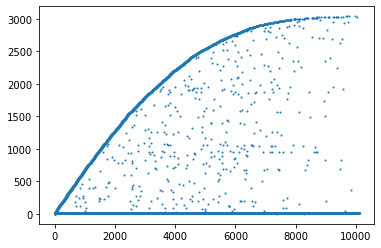

In [0]:
#DBSCAN 클러스터
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN

#mat2 = np.matrix(mat)
#ret = DBSCAN(min_samples=2).fit_predict(mat2)

#mat3 = np.matrix([[1.,.1,.6,.4],[.1,1.,.1,.2],[.6,.1,1.,.7],[.4,.2,.7,1.]])
#SpectralClustering(2).fit_predict(matrix)
ret = DBSCAN(min_samples=1).fit_predict(matrix)

# 클러스터 번호 최소와 최대 저장
MAX=ret.max(); MIN = ret.min()
print(MAX, MIN)
# 각 클러스터들에 얼마나 있는지 세기
t=np.array(ret.shape)
n=t[0]
for i in range(MIN,MAX+1):
  a = (ret==i).sum()
  if a!=0 and a>10:
    print("%d %d"%(i,a))
    
# 클러스터 그림으로 확인하기
#클러스터 확인하기
import matplotlib.pyplot as plt
plt.scatter(range(0,n),ret,s=1)

TypeError: ignored

In [0]:
t=np.array(ret.shape)
n=t[0]
for i in range(-1,n):
  a = (ret==i).sum()
  if a!=0:
    print("%d %d"%(i,a))

0 16686


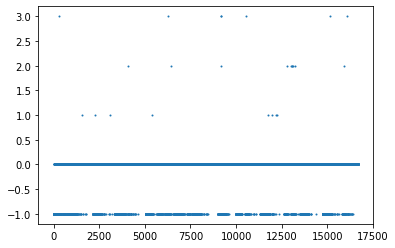

In [0]:
#클러스터 확인하기
import matplotlib.pyplot as plt
plt.scatter(range(0,n),ret,s=1)

In [0]:
import pandas as pd
from IPython.core.display import display

In [0]:
df = pd.DataFrame(matrix)

In [0]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,17.68,11.55,8.12,5.60,5.59,7.94,15.33,27.44,44.96,61.93,83.86,99.21,117.11,121.06,122.16,121.56,125.37,133.37,133.58,107.14,85.66,65.40,41.48,25.91
1,22.19,14.81,10.33,7.18,6.93,10.39,19.54,34.76,57.91,81.85,101.87,114.97,129.22,128.52,125.65,126.29,131.61,143.31,147.74,118.95,95.86,73.78,48.90,31.73
2,9.75,6.36,4.88,3.16,3.01,4.76,9.45,16.55,26.58,35.24,44.30,49.30,54.91,55.35,55.60,55.68,58.97,64.19,65.74,53.15,43.33,33.18,22.67,14.41
3,18.31,11.98,8.61,5.77,5.75,8.42,16.47,29.57,48.18,65.91,87.75,102.64,119.93,124.14,126.25,126.05,130.55,138.36,137.94,110.60,89.22,67.58,43.39,26.96
4,10.84,7.14,5.26,3.52,3.36,5.47,10.57,18.45,30.03,40.81,49.67,54.44,59.52,58.74,57.75,58.17,61.65,68.00,70.68,57.22,46.58,35.87,24.66,15.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16681,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.06,0.09,0.10,0.11,0.10,0.09,0.09,0.10,0.10,0.10,0.08,0.05,0.03,0.02,0.01,0.01
16682,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.04,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.07,0.06,0.05,0.03,0.02,0.02,0.01,0.00
16683,0.01,0.00,0.00,0.00,0.00,0.01,0.03,0.10,0.16,0.21,0.24,0.26,0.25,0.23,0.22,0.23,0.24,0.25,0.20,0.12,0.08,0.05,0.03,0.02
16684,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00


In [0]:
from sklearn.preprocessing import StandardScalerx_std; x_std= StandardScaler().fit_transform(X)

ImportError: ignored

In [0]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,17.68,11.55,8.12,5.60,5.59,7.94,15.33,27.44,44.96,61.93,83.86,99.21,117.11,121.06,122.16,121.56,125.37,133.37,133.58,107.14,85.66,65.40,41.48,25.91
1,22.19,14.81,10.33,7.18,6.93,10.39,19.54,34.76,57.91,81.85,101.87,114.97,129.22,128.52,125.65,126.29,131.61,143.31,147.74,118.95,95.86,73.78,48.90,31.73
2,9.75,6.36,4.88,3.16,3.01,4.76,9.45,16.55,26.58,35.24,44.30,49.30,54.91,55.35,55.60,55.68,58.97,64.19,65.74,53.15,43.33,33.18,22.67,14.41
3,18.31,11.98,8.61,5.77,5.75,8.42,16.47,29.57,48.18,65.91,87.75,102.64,119.93,124.14,126.25,126.05,130.55,138.36,137.94,110.60,89.22,67.58,43.39,26.96
4,10.84,7.14,5.26,3.52,3.36,5.47,10.57,18.45,30.03,40.81,49.67,54.44,59.52,58.74,57.75,58.17,61.65,68.00,70.68,57.22,46.58,35.87,24.66,15.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16681,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.06,0.09,0.10,0.11,0.10,0.09,0.09,0.10,0.10,0.10,0.08,0.05,0.03,0.02,0.01,0.01
16682,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.04,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.07,0.06,0.05,0.03,0.02,0.02,0.01,0.00
16683,0.01,0.00,0.00,0.00,0.00,0.01,0.03,0.10,0.16,0.21,0.24,0.26,0.25,0.23,0.22,0.23,0.24,0.25,0.20,0.12,0.08,0.05,0.03,0.02
16684,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00


In [0]:
t=np.array(ret.shape)
n=t[0]
for i in range(0,n):
  a = (ret==i).sum()
  if a!=0:
    print("%d %d"%(i,a))
  

0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 3
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 2
23 1
24 1
25 1
26 1
27 1
28 1
29 1
30 14644
31 1
32 1
33 10
34 1
35 1
36 1
37 1
38 1
39 1
40 3
41 1
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 1
52 1
53 1
54 1
55 14
56 2
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 1
69 1
70 1
71 1
72 1
73 1
74 2
75 1
76 1
77 1
78 1
79 1
80 1
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1
100 1
101 1
102 1
103 1
104 1
105 1
106 1
107 1
108 1
109 1
110 1
111 1
112 1
113 1
114 2
115 1
116 1
117 1
118 1
119 1
120 1
121 1
122 1
123 1
124 8
125 1
126 1
127 1
128 1
129 1
130 1
131 1
132 1
133 1
134 1
135 1
136 1
137 1
138 1
139 1
140 1
141 1
142 1
143 1
144 1
145 1
146 13
147 1
148 1
149 1
150 1
151 1
152 1
153 1
154 1
155 1
156 1
157 1
158 1
159 1
160 1
161 1
162 1
163 1
164 8
165 1
166 8
167 1
168 1
169 1
170 2
171 1
172 1
173 1
174 1
175 1
176 1
177 1
178 1
179 2
180 1
181 1
182 1
183 1